In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/melspec8_1/train/',
                                                 target_size = (64, 64),
                                                 shuffle=True)

Found 10813 images belonging to 15 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/melspec8_1/val/',
                                            target_size = (64, 64),
                                            shuffle=False)

Found 1319 images belonging to 15 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(15, activation='softmax')
])

In [ ]:
from keras.callbacks import History 
history = History()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [ ]:
History = model.fit(training_set, validation_data = test_set, batch_size=32,epochs=50,callbacks=[history])

Epoch 1/50
338/338 [==============================] - 2234s 7s/step - loss: 2.5013 - accuracy: 0.2910 - val_loss: 3.1005 - val_accuracy: 0.1903
Epoch 2/50
338/338 [==============================] - 319s 944ms/step - loss: 1.8642 - accuracy: 0.4294 - val_loss: 1.7028 - val_accuracy: 0.4632
Epoch 3/50
338/338 [==============================] - 318s 940ms/step - loss: 1.5660 - accuracy: 0.5039 - val_loss: 1.6356 - val_accuracy: 0.4890
Epoch 4/50
338/338 [==============================] - 318s 940ms/step - loss: 1.4475 - accuracy: 0.5463 - val_loss: 1.3810 - val_accuracy: 0.5451
Epoch 5/50
338/338 [==============================] - 319s 943ms/step - loss: 1.3012 - accuracy: 0.5915 - val_loss: 1.2658 - val_accuracy: 0.6096
Epoch 6/50
338/338 [==============================] - 316s 934ms/step - loss: 1.1991 - accuracy: 0.6300 - val_loss: 1.6048 - val_accuracy: 0.5284
Epoch 7/50
338/338 [==============================] - 312s 921ms/step - loss: 1.1739 - accuracy: 0.6385 - val_loss: 1.1212 - v

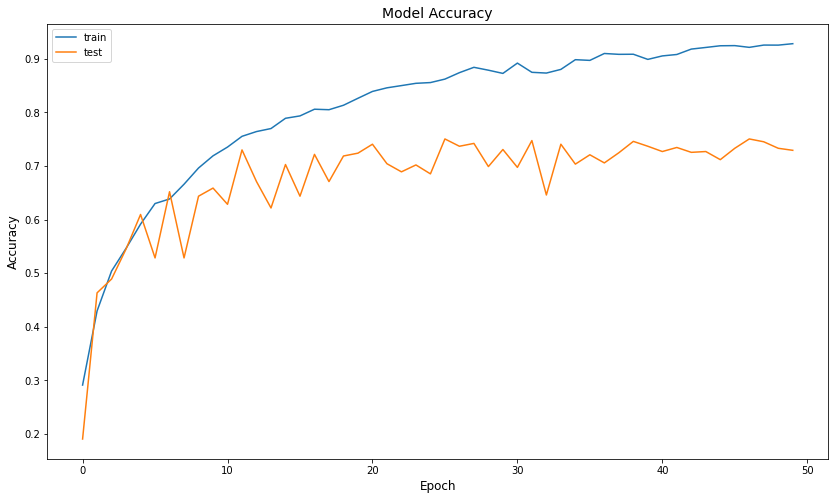

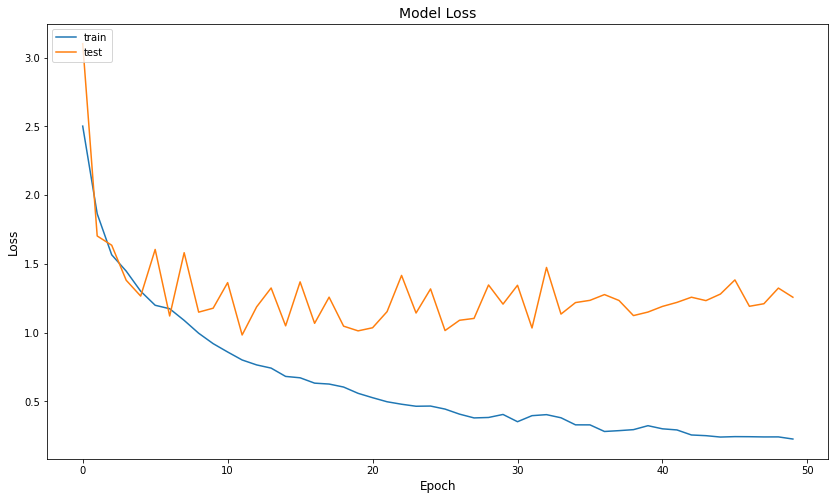

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()